In [1]:
# Importing our dependencies
from sklearn.model_selection import train_test_split
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import sklearn as skl
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.datasets import make_regression


#  Import the Baseball csv to show data
import pandas as pd
baseball_df = pd.read_csv("Resources/Batting_Salary.csv")
baseball_df.head()


# This is what we'd do to pull it from the database once that is created
#     import sqlite3
# creating the connection
#    bball = sqlite3.connect('Baseball_Salaries.db')
# read data from SQL to our pandas dataframe that we will use throughout this model.
#   baseball_df = pd.read_sql_query('Select * from Baseball_Salaries;', bball)

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary
0,aardsda01,2009,1,SEA,AL,73,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000
1,abreubo01,2009,1,LAA,AL,152,563.0,96.0,165.0,29.0,...,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000
2,adamsmi03,2009,1,SDN,NL,37,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800
3,adenhni01,2009,1,LAA,AL,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000
4,affelje01,2009,1,SFN,NL,74,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000


In [2]:
#check out the data in our table
baseball_df.head()

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary
0,aardsda01,2009,1,SEA,AL,73,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000
1,abreubo01,2009,1,LAA,AL,152,563.0,96.0,165.0,29.0,...,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000
2,adamsmi03,2009,1,SDN,NL,37,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800
3,adenhni01,2009,1,LAA,AL,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000
4,affelje01,2009,1,SFN,NL,74,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000


In [3]:
#exploring the values in the specific columns
baseball_df.nunique()

player_id    1645
year            6
stint           2
team_id        31
league_id       2
g             162
ab            649
r             121
h             211
double         56
triple         17
hr             50
rbi           131
sb             55
cs             21
bb            114
so            190
ibb            30
hbp            26
sh             21
sf             13
g_idp          32
salary       1224
dtype: int64

In [4]:
#reviewing the years included in the dataset

baseball_df.year.value_counts()

2011    812
2012    811
2013    809
2014    796
2010    790
2009    787
Name: year, dtype: int64

<AxesSubplot:xlabel='h', ylabel='salary'>

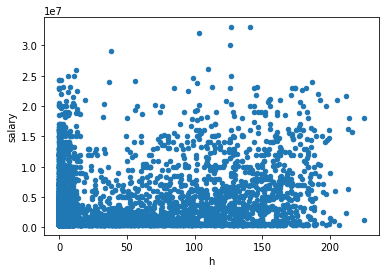

In [5]:
#plotting the hits vs. salary to gain an understanding of the data
baseball_df.plot.scatter('h','salary')

<AxesSubplot:>

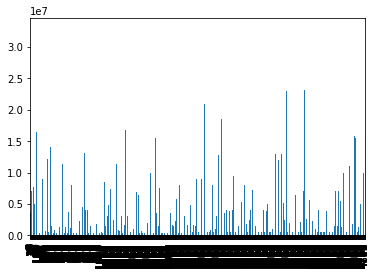

In [6]:
#plotting salary vs player
baseball_df.salary.plot.bar()

In [7]:
#drop columns with insignificant values
# Drop the non-beneficial ID columns, player_id and league_id.
baseball_df = baseball_df.drop(columns=['player_id','league_id'])
baseball_df.head()


,year,stint,team_id,g,ab,r,h,double,triple,hr,...,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary
0,2009,1,SEA,73,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000
1,2009,1,LAA,152,563.0,96.0,165.0,29.0,3.0,15.0,...,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000
2,2009,1,SDN,37,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800
3,2009,1,LAA,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000
4,2009,1,SFN,74,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000


In [8]:
#check datatypes of each column
baseball_df.dtypes

year         int64
stint        int64
team_id     object
g            int64
ab         float64
r          float64
h          float64
double     float64
triple     float64
hr         float64
rbi        float64
sb         float64
cs         float64
bb         float64
so         float64
ibb        float64
hbp        float64
sh         float64
sf         float64
g_idp      float64
salary       int64
dtype: object

In [9]:
# Verify there are no null values
baseball_df.isnull().values.any()

False

In [10]:
# Get description of each column. Set view to view all columns.
pd.set_option("display.max_columns", None)
baseball_df.describe(include="all")

,year,stint,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary
count,4805.000000,4805.000000,4805,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.00000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4.805000e+03
unique,NaN,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,BOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011.510510,1.002497,NaN,68.906764,174.472216,22.333195,45.009781,8.944225,0.89948,5.090323,21.459105,3.122997,1.170239,16.294693,36.602081,1.255567,1.675338,1.498439,1.375650,3.913840,3.544561e+06
std,1.700805,0.049917,NaN,47.091038,207.126452,29.610346,57.386529,11.920995,1.82945,8.367232,29.364910,7.182820,2.344708,22.540484,43.330539,2.896140,2.934532,2.720510,2.128909,5.531951,4.739865e+06
min,2009.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+05
25%,2010.000000,1.000000,NaN,31.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.950000e+05
50%,2012.000000,1.000000,NaN,60.000000,60.000000,4.000000,10.000000,2.000000,0.00000,0.000000,4.000000,0.000000,0.000000,3.000000,19.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.250000e+06
75%,2013.000000,1.000000,NaN,107.000000,336.000000,41.000000,85.000000,16.000000,1.00000,7.000000,37.000000,3.000000,1.000000,28.000000,63.000000,1.000000,2.000000,2.000000,2.000000,6.000000,4.800000e+06


In [11]:
# Check stint values as players have multiple stints would be equivalent to duplicates.
baseball_df.stint.value_counts()

1    4793
2      12
Name: stint, dtype: int64

In [12]:
# Drop the 2nd stint values.
baseball_df = baseball_df[baseball_df.stint == 1]

In [13]:
# Drop stint column.
baseball_df = baseball_df.drop(columns=["stint"])
baseball_df.head()

,year,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary
0,2009,SEA,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000
1,2009,LAA,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000
2,2009,SDN,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800
3,2009,LAA,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000
4,2009,SFN,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000


In [14]:
baseball_df = baseball_df[baseball_df.ab > 0]

In [15]:
# Get updated description of each column.
baseball_df.describe(include="all")

,year,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary
count,3720.000000,3720,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3.720000e+03
unique,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,LAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011.498387,NaN,76.908333,225.129301,28.823656,58.086290,11.545430,1.161290,6.572849,27.700000,4.023118,1.508871,21.024731,47.212634,1.621505,2.162634,1.925000,1.775269,5.051882,3.953252e+06
std,1.706479,NaN,49.049524,209.799029,30.751099,59.114368,12.391528,2.004782,8.982883,30.676732,7.932459,2.565816,23.598368,43.864494,3.200190,3.172914,2.953893,2.267896,5.812037,5.125917e+06
min,2009.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+05
25%,2010.000000,NaN,32.000000,26.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.980000e+05
50%,2012.000000,NaN,69.000000,167.000000,18.000000,39.000000,7.000000,0.000000,2.000000,16.000000,0.000000,0.000000,13.000000,35.000000,0.000000,1.000000,1.000000,1.000000,3.000000,1.500000e+06
75%,2013.000000,NaN,123.250000,410.000000,51.000000,107.000000,20.000000,2.000000,10.000000,48.000000,4.000000,2.000000,35.000000,77.000000,2.000000,3.000000,3.000000,3.000000,8.000000,5.500000e+06


In [16]:
# Created single column. Hit-double-triple-homerun = single
baseball_df["single"] = baseball_df["h"] - baseball_df["double"] - baseball_df["triple"] - baseball_df["hr"]
baseball_df

,year,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single
1,2009,LAA,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0
4,2009,SFN,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0
6,2009,BAL,56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,410000,0.0
7,2009,FLO,27,69.0,6.0,15.0,3.0,0.0,0.0,5.0,1.0,1.0,5.0,16.0,2.0,0.0,0.0,1.0,0.0,1300000,12.0
8,2009,CHA,65,185.0,25.0,44.0,9.0,0.0,2.0,13.0,3.0,6.0,20.0,49.0,0.0,3.0,2.0,0.0,4.0,440000,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,2014,ARI,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0
4801,2014,WAS,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0
4802,2014,WAS,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0
4803,2014,TBA,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0


In [17]:
# Created slugging percentage. Slg % = (single +2*double + 3*triple + 4*home run) / at-bat
baseball_df["slg %"] = (baseball_df["single"] + 2*baseball_df["double"] + 3*baseball_df["triple"] + 4*baseball_df["hr"]) / baseball_df["ab"]
baseball_df

,year,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %
1,2009,LAA,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0,0.435169
4,2009,SFN,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0,0.500000
6,2009,BAL,56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,410000,0.0,0.000000
7,2009,FLO,27,69.0,6.0,15.0,3.0,0.0,0.0,5.0,1.0,1.0,5.0,16.0,2.0,0.0,0.0,1.0,0.0,1300000,12.0,0.260870
8,2009,CHA,65,185.0,25.0,44.0,9.0,0.0,2.0,13.0,3.0,6.0,20.0,49.0,0.0,3.0,2.0,0.0,4.0,440000,33.0,0.318919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,2014,ARI,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0,0.000000
4801,2014,WAS,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0,0.200000
4802,2014,WAS,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0,0.448598
4803,2014,TBA,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0,0.394737


In [18]:
# Created on-base percentage (obp) = (h + bb + hbp) / (ab + bb + hbp + sf)
baseball_df["obp"] = (
    baseball_df["h"] + baseball_df["bb"] + baseball_df["hbp"]) / (baseball_df["ab"] + baseball_df["bb"] + baseball_df["hbp"] + baseball_df["sf"])
baseball_df

,year,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %,obp
1,2009,LAA,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0,0.435169,0.389805
4,2009,SFN,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0,0.500000,0.500000
6,2009,BAL,56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,410000,0.0,0.000000,0.000000
7,2009,FLO,27,69.0,6.0,15.0,3.0,0.0,0.0,5.0,1.0,1.0,5.0,16.0,2.0,0.0,0.0,1.0,0.0,1300000,12.0,0.260870,0.266667
8,2009,CHA,65,185.0,25.0,44.0,9.0,0.0,2.0,13.0,3.0,6.0,20.0,49.0,0.0,3.0,2.0,0.0,4.0,440000,33.0,0.318919,0.322115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,2014,ARI,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0,0.000000,0.000000
4801,2014,WAS,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0,0.200000,0.206897
4802,2014,WAS,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0,0.448598,0.341667
4803,2014,TBA,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0,0.394737,0.354294


In [19]:
# Created batting avg = h / ab
baseball_df["batting avg"] = baseball_df["h"] / baseball_df["ab"]

In [20]:
# Create on base percentage plus slugging (ops) = obp + slg
baseball_df["ops"] = baseball_df["obp"] + baseball_df["slg %"]
baseball_df

,year,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %,obp,batting avg,ops
1,2009,LAA,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0,0.435169,0.389805,0.293073,0.824974
4,2009,SFN,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0,0.500000,0.500000,0.500000,1.000000
6,2009,BAL,56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,410000,0.0,0.000000,0.000000,0.000000,0.000000
7,2009,FLO,27,69.0,6.0,15.0,3.0,0.0,0.0,5.0,1.0,1.0,5.0,16.0,2.0,0.0,0.0,1.0,0.0,1300000,12.0,0.260870,0.266667,0.217391,0.527536
8,2009,CHA,65,185.0,25.0,44.0,9.0,0.0,2.0,13.0,3.0,6.0,20.0,49.0,0.0,3.0,2.0,0.0,4.0,440000,33.0,0.318919,0.322115,0.237838,0.641034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,2014,ARI,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0,0.000000,0.000000,0.000000,0.000000
4801,2014,WAS,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0,0.200000,0.206897,0.181818,0.406897
4802,2014,WAS,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0,0.448598,0.341667,0.280374,0.790265
4803,2014,TBA,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0,0.394737,0.354294,0.271930,0.749031


In [21]:
# Create total bases(tb) stat = 1*single + 2*double + 3*triple + 4*hr
baseball_df["tb"] = baseball_df["single"] + 2*baseball_df["double"] + 3*baseball_df["triple"] + 4*baseball_df["hr"]
baseball_df


,year,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %,obp,batting avg,ops,tb
1,2009,LAA,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0,0.435169,0.389805,0.293073,0.824974,245.0
4,2009,SFN,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0,0.500000,0.500000,0.500000,1.000000,1.0
6,2009,BAL,56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,410000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
7,2009,FLO,27,69.0,6.0,15.0,3.0,0.0,0.0,5.0,1.0,1.0,5.0,16.0,2.0,0.0,0.0,1.0,0.0,1300000,12.0,0.260870,0.266667,0.217391,0.527536,18.0
8,2009,CHA,65,185.0,25.0,44.0,9.0,0.0,2.0,13.0,3.0,6.0,20.0,49.0,0.0,3.0,2.0,0.0,4.0,440000,33.0,0.318919,0.322115,0.237838,0.641034,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,2014,ARI,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4801,2014,WAS,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0,0.200000,0.206897,0.181818,0.406897,11.0
4802,2014,WAS,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0,0.448598,0.341667,0.280374,0.790265,96.0
4803,2014,TBA,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0,0.394737,0.354294,0.271930,0.749031,225.0


In [22]:
# Create runs created (rc) = tb * (h + bb) / (ab+bb)
baseball_df["rc"] = baseball_df["tb"] * (baseball_df["h"] + baseball_df["bb"]) / (baseball_df["ab"] + baseball_df["bb"])
baseball_df

,year,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %,obp,batting avg,ops,tb,rc
1,2009,LAA,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0,0.435169,0.389805,0.293073,0.824974,245.0,96.582953
4,2009,SFN,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0,0.500000,0.500000,0.500000,1.000000,1.0,0.500000
6,2009,BAL,56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,410000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,2009,FLO,27,69.0,6.0,15.0,3.0,0.0,0.0,5.0,1.0,1.0,5.0,16.0,2.0,0.0,0.0,1.0,0.0,1300000,12.0,0.260870,0.266667,0.217391,0.527536,18.0,4.864865
8,2009,CHA,65,185.0,25.0,44.0,9.0,0.0,2.0,13.0,3.0,6.0,20.0,49.0,0.0,3.0,2.0,0.0,4.0,440000,33.0,0.318919,0.322115,0.237838,0.641034,59.0,18.419512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,2014,ARI,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4801,2014,WAS,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0,0.200000,0.206897,0.181818,0.406897,11.0,2.315789
4802,2014,WAS,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0,0.448598,0.341667,0.280374,0.790265,96.0,33.355932
4803,2014,TBA,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0,0.394737,0.354294,0.271930,0.749031,225.0,80.232558


In [23]:
# create Batting Average on Balls in Play (BABIP) = (H-HR)/(AB-SO-HR+SF)
baseball_df["babip"] = (baseball_df["h"] - baseball_df["hr"])/(baseball_df["ab"] - baseball_df["so"] - baseball_df["hr"] + baseball_df["sf"])
baseball_df

,year,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %,obp,batting avg,ops,tb,rc,babip
1,2009,LAA,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0,0.435169,0.389805,0.293073,0.824974,245.0,96.582953,0.337838
4,2009,SFN,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0,0.500000,0.500000,0.500000,1.000000,1.0,0.500000,0.500000
6,2009,BAL,56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,410000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
7,2009,FLO,27,69.0,6.0,15.0,3.0,0.0,0.0,5.0,1.0,1.0,5.0,16.0,2.0,0.0,0.0,1.0,0.0,1300000,12.0,0.260870,0.266667,0.217391,0.527536,18.0,4.864865,0.277778
8,2009,CHA,65,185.0,25.0,44.0,9.0,0.0,2.0,13.0,3.0,6.0,20.0,49.0,0.0,3.0,2.0,0.0,4.0,440000,33.0,0.318919,0.322115,0.237838,0.641034,59.0,18.419512,0.313433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,2014,ARI,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
4801,2014,WAS,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0,0.200000,0.206897,0.181818,0.406897,11.0,2.315789,0.285714
4802,2014,WAS,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0,0.448598,0.341667,0.280374,0.790265,96.0,33.355932,0.312500
4803,2014,TBA,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0,0.394737,0.354294,0.271930,0.749031,225.0,80.232558,0.300830


In [24]:
# create Plate Appearance (PA) = AB + BB + HBP + SF + SH
baseball_df["pa"] = baseball_df["ab"] + baseball_df["bb"] + baseball_df["hbp"] + baseball_df["sf"] + baseball_df["sh"]
baseball_df

,year,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %,obp,batting avg,ops,tb,rc,babip,pa
1,2009,LAA,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0,0.435169,0.389805,0.293073,0.824974,245.0,96.582953,0.337838,667.0
4,2009,SFN,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0,0.500000,0.500000,0.500000,1.000000,1.0,0.500000,0.500000,2.0
6,2009,BAL,56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,410000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,1.0
7,2009,FLO,27,69.0,6.0,15.0,3.0,0.0,0.0,5.0,1.0,1.0,5.0,16.0,2.0,0.0,0.0,1.0,0.0,1300000,12.0,0.260870,0.266667,0.217391,0.527536,18.0,4.864865,0.277778,75.0
8,2009,CHA,65,185.0,25.0,44.0,9.0,0.0,2.0,13.0,3.0,6.0,20.0,49.0,0.0,3.0,2.0,0.0,4.0,440000,33.0,0.318919,0.322115,0.237838,0.641034,59.0,18.419512,0.313433,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,2014,ARI,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,1.0
4801,2014,WAS,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0,0.200000,0.206897,0.181818,0.406897,11.0,2.315789,0.285714,67.0
4802,2014,WAS,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0,0.448598,0.341667,0.280374,0.790265,96.0,33.355932,0.312500,240.0
4803,2014,TBA,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0,0.394737,0.354294,0.271930,0.749031,225.0,80.232558,0.300830,654.0


In [25]:
# Fill nan of new columns with 0
baseball_df = baseball_df.fillna(0)

In [26]:
# Create function to bucket years. 2009 = 0, 2010 = 1, etc.
def changeYear(year):
    if year == 2009:
        return 0
    elif year == 2010:
        return 1
    elif year == 2011:
        return 2
    elif year == 2012:
        return 3
    elif year == 2013:
        return 4
    elif year == 2014:
        return 5
    else:
        return 6

In [27]:
baseball_df["year"] = baseball_df["year"].apply(changeYear)
baseball_df

,year,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %,obp,batting avg,ops,tb,rc,babip,pa
1,0,LAA,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0,0.435169,0.389805,0.293073,0.824974,245.0,96.582953,0.337838,667.0
4,0,SFN,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0,0.500000,0.500000,0.500000,1.000000,1.0,0.500000,0.500000,2.0
6,0,BAL,56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,410000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0
7,0,FLO,27,69.0,6.0,15.0,3.0,0.0,0.0,5.0,1.0,1.0,5.0,16.0,2.0,0.0,0.0,1.0,0.0,1300000,12.0,0.260870,0.266667,0.217391,0.527536,18.0,4.864865,0.277778,75.0
8,0,CHA,65,185.0,25.0,44.0,9.0,0.0,2.0,13.0,3.0,6.0,20.0,49.0,0.0,3.0,2.0,0.0,4.0,440000,33.0,0.318919,0.322115,0.237838,0.641034,59.0,18.419512,0.313433,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,5,ARI,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0
4801,5,WAS,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0,0.200000,0.206897,0.181818,0.406897,11.0,2.315789,0.285714,67.0
4802,5,WAS,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0,0.448598,0.341667,0.280374,0.790265,96.0,33.355932,0.312500,240.0
4803,5,TBA,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0,0.394737,0.354294,0.271930,0.749031,225.0,80.232558,0.300830,654.0


array([[<AxesSubplot:title={'center':'salary'}>]], dtype=object)

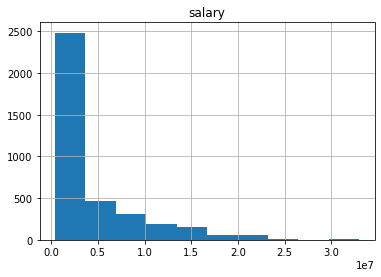

In [28]:
# Create histogram of salary to see distribution.
baseball_df.hist(column="salary")

In [29]:
# Get median salary for each year, due to skewed distribution.
median_salary = baseball_df.groupby(["year"])["salary"].median()
median_salary

year
0    1400000.0
1    1375000.0
2    1500000.0
3    1250000.0
4    1600000.0
5    1500000.0
Name: salary, dtype: float64

In [30]:
# Create function to add column to dataset for highly paid = 0, no = 1
def highly_paid(row):
    if row["year"] == 0 and  row["salary"]  >= median_salary[0]:
        return 0
    elif row["year"] == 0 and row["salary"] < median_salary[0]:
        return 1
    elif row["year"] == 1 and row["salary"] >= median_salary[1]:
        return 0
    elif row["year"] == 1 and row["salary"] < median_salary[1]:
        return 1
    elif row["year"] == 2 and row["salary"] >= median_salary[2]:
        return 0
    elif row["year"] == 2 and row["salary"] < median_salary[2]:
        return 1
    elif row["year"] == 3 and row["salary"] >= median_salary[3]:
        return 0
    elif row["year"] == 3 and row["salary"] < median_salary[3]:
        return 1
    elif row["year"] == 4 and row["salary"] >= median_salary[4]:
        return 0
    elif row["year"] == 4 and row["salary"] < median_salary[4]:
        return 1
    elif row["year"] == 5 and row["salary"] >= median_salary[5]:
        return 0
    elif row["year"] == 5 and row["salary"] < median_salary[5]:   
        return 1

In [31]:
# Create highly paid column
baseball_df["high_paid"] = baseball_df.apply (lambda row: highly_paid(row), axis=1)
baseball_df

,year,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %,obp,batting avg,ops,tb,rc,babip,pa,high_paid
1,0,LAA,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0,0.435169,0.389805,0.293073,0.824974,245.0,96.582953,0.337838,667.0,0
4,0,SFN,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0,0.500000,0.500000,0.500000,1.000000,1.0,0.500000,0.500000,2.0,0
6,0,BAL,56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,410000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,1
7,0,FLO,27,69.0,6.0,15.0,3.0,0.0,0.0,5.0,1.0,1.0,5.0,16.0,2.0,0.0,0.0,1.0,0.0,1300000,12.0,0.260870,0.266667,0.217391,0.527536,18.0,4.864865,0.277778,75.0,1
8,0,CHA,65,185.0,25.0,44.0,9.0,0.0,2.0,13.0,3.0,6.0,20.0,49.0,0.0,3.0,2.0,0.0,4.0,440000,33.0,0.318919,0.322115,0.237838,0.641034,59.0,18.419512,0.313433,210.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,5,ARI,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0
4801,5,WAS,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0,0.200000,0.206897,0.181818,0.406897,11.0,2.315789,0.285714,67.0,0
4802,5,WAS,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0,0.448598,0.341667,0.280374,0.790265,96.0,33.355932,0.312500,240.0,0
4803,5,TBA,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0,0.394737,0.354294,0.271930,0.749031,225.0,80.232558,0.300830,654.0,0


In [32]:
# Get count of yes and no
baseball_df.high_paid.value_counts()

0    1876
1    1844
Name: high_paid, dtype: int64

In [35]:
# Create high_paid_n column, 0 = Yes, 1 = No
import numpy as np
baseball_df["high_paid_n"] = np.where(baseball_df["high_paid"] == 1, 0, 1)
baseball_df

,year,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %,obp,batting avg,ops,tb,rc,babip,pa,high_paid,high_paid_n
1,0,LAA,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0,0.435169,0.389805,0.293073,0.824974,245.0,96.582953,0.337838,667.0,0,1
4,0,SFN,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0,0.500000,0.500000,0.500000,1.000000,1.0,0.500000,0.500000,2.0,0,1
6,0,BAL,56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,410000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,1,0
7,0,FLO,27,69.0,6.0,15.0,3.0,0.0,0.0,5.0,1.0,1.0,5.0,16.0,2.0,0.0,0.0,1.0,0.0,1300000,12.0,0.260870,0.266667,0.217391,0.527536,18.0,4.864865,0.277778,75.0,1,0
8,0,CHA,65,185.0,25.0,44.0,9.0,0.0,2.0,13.0,3.0,6.0,20.0,49.0,0.0,3.0,2.0,0.0,4.0,440000,33.0,0.318919,0.322115,0.237838,0.641034,59.0,18.419512,0.313433,210.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,5,ARI,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0,1
4801,5,WAS,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0,0.200000,0.206897,0.181818,0.406897,11.0,2.315789,0.285714,67.0,0,1
4802,5,WAS,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0,0.448598,0.341667,0.280374,0.790265,96.0,33.355932,0.312500,240.0,0,1
4803,5,TBA,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0,0.394737,0.354294,0.271930,0.749031,225.0,80.232558,0.300830,654.0,0,1


In [36]:
# Rename high_paid to high_paid_y, 0 = Yes, 1 = No
baseball_df = baseball_df.rename(columns={"high_paid": "high_paid_y"})
baseball_df

,year,team_id,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %,obp,batting avg,ops,tb,rc,babip,pa,high_paid_y,high_paid_n
1,0,LAA,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0,0.435169,0.389805,0.293073,0.824974,245.0,96.582953,0.337838,667.0,0,1
4,0,SFN,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0,0.500000,0.500000,0.500000,1.000000,1.0,0.500000,0.500000,2.0,0,1
6,0,BAL,56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,410000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,1,0
7,0,FLO,27,69.0,6.0,15.0,3.0,0.0,0.0,5.0,1.0,1.0,5.0,16.0,2.0,0.0,0.0,1.0,0.0,1300000,12.0,0.260870,0.266667,0.217391,0.527536,18.0,4.864865,0.277778,75.0,1,0
8,0,CHA,65,185.0,25.0,44.0,9.0,0.0,2.0,13.0,3.0,6.0,20.0,49.0,0.0,3.0,2.0,0.0,4.0,440000,33.0,0.318919,0.322115,0.237838,0.641034,59.0,18.419512,0.313433,210.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,5,ARI,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0,1
4801,5,WAS,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0,0.200000,0.206897,0.181818,0.406897,11.0,2.315789,0.285714,67.0,0,1
4802,5,WAS,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0,0.448598,0.341667,0.280374,0.790265,96.0,33.355932,0.312500,240.0,0,1
4803,5,TBA,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0,0.394737,0.354294,0.271930,0.749031,225.0,80.232558,0.300830,654.0,0,1


<AxesSubplot:>

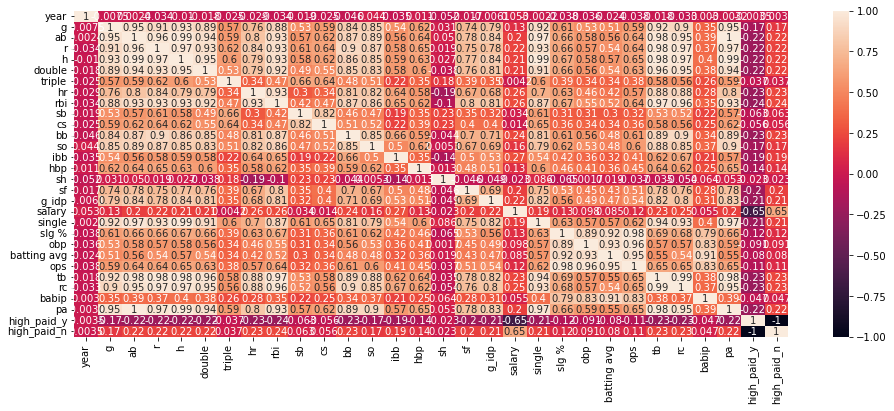

In [37]:
# Create heatmap to see correlation between columns
import seaborn as sns
plt.figure(figsize=(16, 6))
sns.heatmap(baseball_df.corr(),vmin=-1, vmax=1, annot=True)

<AxesSubplot:>

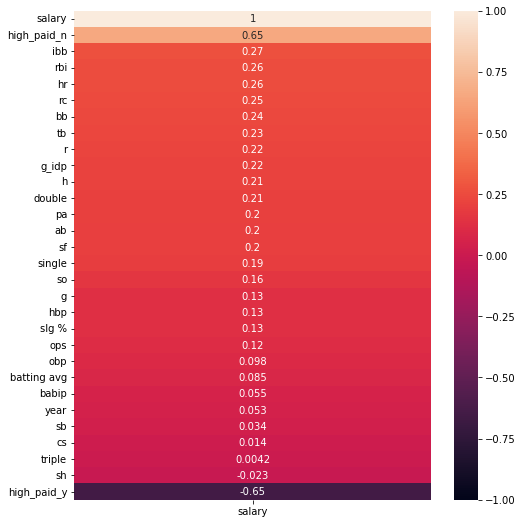

In [38]:
# Create heatmap to see correlation between salary column specifically.
plt.figure(figsize=(8, 9))
sns.heatmap(baseball_df.corr()[["salary"]].sort_values(by="salary", ascending=False), vmin=-1, vmax=1, annot=True)

<AxesSubplot:>

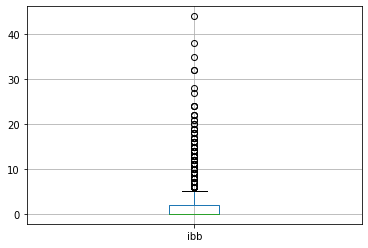

In [39]:
# Show outliers in ibb column
baseball_df.boxplot(column=["ibb"])

In [40]:
# Create team and salary only dataframe for correlation check.
team_salary_df = baseball_df[["team_id", "salary"]].copy()
team_salary_df

,team_id,salary
1,LAA,5000000
4,SFN,3500000
6,BAL,410000
7,FLO,1300000
8,CHA,440000
...,...,...
4800,ARI,4500000
4801,WAS,7500000
4802,WAS,14000000
4803,TBA,7000000


In [41]:
# Use get dummies to create individual columns for team id
team_salary_df = pd.get_dummies(team_salary_df, columns=["team_id"], prefix="team")
team_salary_df

,salary,team_ARI,team_ATL,team_BAL,team_BOS,team_CHA,team_CHN,team_CIN,team_CLE,team_COL,team_DET,team_FLO,team_HOU,team_KCA,team_LAA,team_LAN,team_MIA,team_MIL,team_MIN,team_NYA,team_NYN,team_OAK,team_PHI,team_PIT,team_SDN,team_SEA,team_SFN,team_SLN,team_TBA,team_TEX,team_TOR,team_WAS
1,5000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,410000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1300000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,440000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,4500000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4801,7500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4802,14000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4803,7000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:>

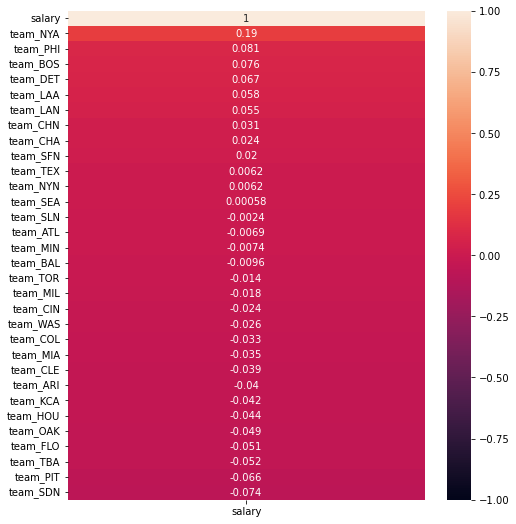

In [42]:
# Create heatmap to test correlation.
plt.figure(figsize=(8, 9))
sns.heatmap(team_salary_df.corr()[["salary"]].sort_values(by="salary", ascending=False), vmin=-1, vmax=1, annot=True)

In [43]:
# # Based on this used get dummies on baseball_df for team_id
# baseball_df = pd.get_dummies(baseball_df, columns=["team_id"], prefix="team")
# baseball_df

In [44]:
# baseball_df = baseball_df.drop(columns=["hbp", "slg %", "obp", "batting avg", "babip", "cs", "sb"])

In [45]:
#removing salary data from the training set
X = baseball_df.drop(columns=["high_paid_y","high_paid_n", "salary", "team_id"]).values
y = baseball_df["high_paid_y"].values
print("Shape: ", X.shape, y.shape)

Shape:  (3720, 27) (3720,)


In [46]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, test_size=.25)

In [47]:
import sklearn as skl
from sklearn.preprocessing import MinMaxScaler
# Create a StandardScaler instances
scaler = MinMaxScaler()

# Fit the StandardScaler
X_scaler = scaler.fit_transform(X_train)

# Scale the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [49]:
predictions = model.predict(X_test)


In [50]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  327
False Positive(FP) =  202
True Negative(TN)  =  263
False Negative(FN) =  138
Accuracy of the binary classification = 0.634


In [51]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression(max_iter=5000)

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC(max_iter=5000)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

C:\Users\Peyton\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [53]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.634409,0.703226,0.618147
Support Vector Machines,0.502151,0.909677,0.501185
Decision Trees,0.551613,0.550538,0.551724
Random Forest,0.620430,0.610753,0.622807
Naive Bayes,0.589247,0.735484,0.569052
K-Nearest Neighbor,0.588172,0.589247,0.587983


In [54]:
# Fit the model to the training data. 
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=5000)

In [55]:
# Call the `score()` method on the model to show the R2 score
# model.score(X_test_scaled, y_test)

In [56]:
# print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
# print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

In [57]:
# Do feature regression to find most correlated features.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 1.273923
Feature 1: 92.076816
Feature 2: 158.867195
Feature 3: 150.690236
Feature 4: 159.220980
Feature 5: 155.618504
Feature 6: 6.311547
Feature 7: 159.980818
Feature 8: 186.545900
Feature 9: 12.634788
Feature 10: 14.028703
Feature 11: 157.646223
Feature 12: 99.160643
Feature 13: 117.885102
Feature 14: 65.294879
Feature 15: 1.553614
Feature 16: 122.730523
Feature 17: 145.038796
Feature 18: 142.325351
Feature 19: 43.598641
Feature 20: 29.752816
Feature 21: 26.643739
Feature 22: 39.376898
Feature 23: 169.559848
Feature 24: 173.796745
Feature 25: 11.644920
Feature 26: 163.485226


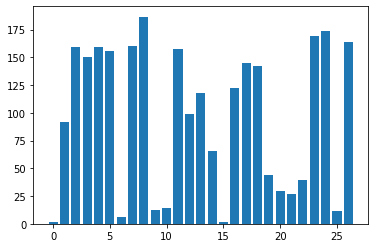

In [58]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [59]:
baseball_df_wo_salary = baseball_df.drop(columns="salary")

In [60]:
# Get sorted list of features by column name and correlation.
sorted(zip(fs.scores_, baseball_df_wo_salary.columns), reverse=True)

[(186.54590027260005, 'hr'),
 (173.79674497822873, 'tb'),
 (169.55984752148782, 'ops'),
 (163.4852257920127, 'babip'),
 (159.980817877198, 'triple'),
 (159.22097968775896, 'r'),
 (158.86719528766827, 'g'),
 (157.64622279927573, 'cs'),
 (155.61850390806833, 'h'),
 (150.69023627791316, 'ab'),
 (145.038796205463, 'sf'),
 (142.32535085502641, 'g_idp'),
 (122.7305231663652, 'sh'),
 (117.8851018913941, 'so'),
 (99.16064287588975, 'bb'),
 (92.07681553927772, 'team_id'),
 (65.2948788060929, 'ibb'),
 (43.59864105364431, 'single'),
 (39.376897966703886, 'batting avg'),
 (29.75281641838365, 'slg %'),
 (26.643738898043722, 'obp'),
 (14.028703301622965, 'sb'),
 (12.63478847085976, 'rbi'),
 (11.6449198562867, 'rc'),
 (6.311546884855141, 'double'),
 (1.5536144282083544, 'hbp'),
 (1.2739226818934257, 'year')]